#### 【 OpenCV - 이미지 저장 】

- 채널 분리
    - 함수: cv2.split(이미지로우데이터)
    - 결과: 튜플 타입에 분리된 채널 데이터 반환

- 채널 병합
    - 함수: cv2.merge(채널데이터, 채널데이터, 채널데이터)
    - 결과: 합쳐진 이미지 로우 데이터

- ★★★ 주의 : opencv 한글 미지원! 경로, 파일명 한글 사용 XXX

[1] 모듈 로딩 및 데이터 준비<hr>

In [8]:
## 이미지 처리 모듈
import cv2

## 시각화 모듈
import matplotlib.pyplot as plt
import koreanize_matplotlib

In [9]:
## 이미지 파일
IMG_FILE = '../Data/Image/flower_rainbow.jpg'

[2] 이미지 로딩 및 정보 확인 <hr>

In [10]:
## 원본 & 회색 로딩
org_img = cv2.imread(IMG_FILE)
gray_img = cv2.imread(IMG_FILE, cv2.IMREAD_GRAYSCALE)

In [11]:
## 이미지 데이터 정보 확인
print(f'[Original IMAGE]')
print(f'형태 : {org_img.shape}  차원 : {org_img.ndim}D  사이즈 : {org_img.size}')

print(f'[Gray IMAGE]')
print(f'형태 : {gray_img.shape}  차원 : {gray_img.ndim}D  사이즈 : {gray_img.size}')

[Original IMAGE]
형태 : (441, 450, 3)  차원 : 3D  사이즈 : 595350
[Gray IMAGE]
형태 : (441, 450)  차원 : 2D  사이즈 : 198450


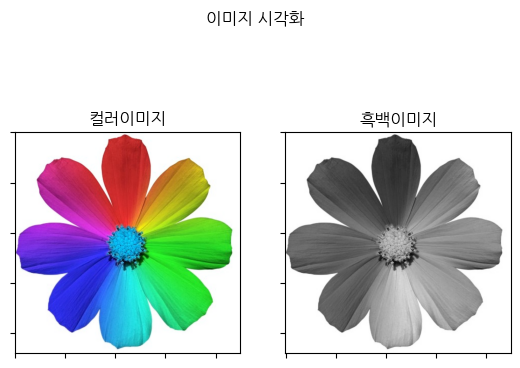

In [12]:
## 이미지 시각화
fig, axes = plt.subplots(1,2, sharey=True)

axes[0].imshow(org_img)
axes[0].set_title("컬러이미지")
axes[0].set_xticklabels([])
axes[0].set_yticklabels([])

axes[1].imshow(gray_img, cmap='gray')
axes[1].set_title("흑백이미지")
axes[1].set_xticklabels([])
axes[1].set_yticklabels([])

plt.suptitle("이미지 시각화")
plt.show()

[3] 이미지 채널 분리 <HR>

In [13]:
## =============================================
## [3-1] opencv의 split()함수 사용
## =============================================
## - packing 방식
channels = cv2.split( org_img )
print(f'channels   : {len(channels)}개 {type(channels[0])}')

## - unpacking 방식
b, g, r = cv2.split( org_img )
print(f'b channels : {type(b)}, {b.shape}')
print(f'g channels : {type(g)}, {g.shape}')
print(f'r channels : {type(r)}, {r.shape}')

channels   : 3개 <class 'numpy.ndarray'>
b channels : <class 'numpy.ndarray'>, (441, 450)
g channels : <class 'numpy.ndarray'>, (441, 450)
r channels : <class 'numpy.ndarray'>, (441, 450)


In [14]:
## - 채널별 이미지 출력
cv2.imshow("Blue Channel", b)
cv2.imshow("Green Channel", g)
cv2.imshow("Red Channel", r)

## - 무한대기 중 어떤 키든 입력 시 모든 창 닫기
cv2.waitKey()
cv2.destroyAllWindows()

In [18]:
## =============================================
## [3-2] ndarray로 채널 분리
## =============================================
print(f'org_img  shape => {org_img.shape}')  # (높이/행, 너비/열, 채널)

## 축변경 (높이/행, 너비/열, 채널) -> (채널, 행, 열)
## ndarray.shape(321, 380, 3)  ->   축0, 축1, 축2
org_img2=org_img.transpose(2, 0, 1)
print(f'org_img2.shape => {org_img2.shape}')


org_img  shape => (441, 450, 3)
org_img2.shape => (3, 441, 450)


In [19]:
## b, g, r 채널 분리
blueArray  = org_img2[0, :, :]
greenArray = org_img2[1]
redArray   = org_img2[2]

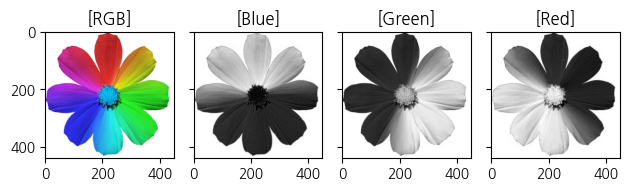

In [ ]:
## 채널별 시각화
titles=['RGB', 'Blue', 'Green', 'Red']
rawImg=[org_img, org_img2[0], org_img2[1], org_img2[2]]

fig, axes = plt.subplots(1, 4, sharey=True)
for idx, ax in enumerate(axes):
    ax.imshow(rawImg[idx], cmap='gray')
    ax.set_title(f'[{titles[idx]}]')
    
plt.tight_layout()
plt.show()